<a href="https://colab.research.google.com/github/waltechel/202209-novice-nlp-with-python/blob/master/Ch%2008.%20%EA%B0%90%EC%84%B1%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 8. 감성 분석



## 8.1 감성분석의 이해

감성분석은 텍스트에 나타난 의견, 평가, 태도와 같은 주관적인 정보를 분석하는 것을 말한다. 

감성분석 방법론은 다양하게 분류될 수 있는데, 크게는 어휘 기반 분석과 기계학습 기반의 분석으로 나뉘어진다.

### 8.1.1 어휘 기반의 감성 분석

감성사전으로부터 각 단어들에 대한 감성 값을 가져온 후에 이를 조합해 텍스트에 대한 감성을 계산하는 다양한 방법이 있다. 

이와 같은 문제점을 극복하기 위해 문장의 형태소를 분석하고 다시 이를 명사구, 형용사구와 같은 구로 묶는 청킹을 한 후에 밑의 단어로부터 상위의 구로 이동하면서 단계적으로 긍정/부정을 결정하는 방식도 있다. 



## 8.2 감성 사전을 이용한 영화 리뷰 감성 분석

### 8.2.1 NLTK 영화 리뷰 데이터 준비

1: https://www.nltk.org/book/ch02.html

In [1]:
import nltk
nltk.download('movie_reviews')

from nltk.corpus import movie_reviews

print('#review count:', len(movie_reviews.fileids())) #영화 리뷰 문서의 id를 반환
print('#samples of file ids:', movie_reviews.fileids()[:10]) #id를 10개까지만 출력
print('#categories of reviews:', movie_reviews.categories()) # label, 즉 긍정인지 부정인지에 대한 분류
print('#num of "neg" reviews:', len(movie_reviews.fileids(categories='neg'))) #label이 부정인 문서들의 id를 반환
print('#num of "pos" reviews:', len(movie_reviews.fileids(categories='pos'))) #label이 긍정인 문서들의 id를 반환

fileid = movie_reviews.fileids()[0] #첫번째 문서의 id를 반환
print('#id of the first review:', fileid)
print('#part of the first review:', movie_reviews.raw(fileid)[:500]) #첫번째 문서의 내용을 500자까지만 출력
print('#sentiment of the first review:', movie_reviews.categories(fileid)) #첫번째 문서의 감성

fileids = movie_reviews.fileids() #movie review data에서 file id를 가져옴
reviews = [movie_reviews.raw(fileid) for fileid in fileids] #file id를 이용해 raw text file을 가져옴
categories = [movie_reviews.categories(fileid)[0] for fileid in fileids] 

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


#review count: 2000
#samples of file ids: ['neg/cv000_29416.txt', 'neg/cv001_19502.txt', 'neg/cv002_17424.txt', 'neg/cv003_12683.txt', 'neg/cv004_12641.txt', 'neg/cv005_29357.txt', 'neg/cv006_17022.txt', 'neg/cv007_4992.txt', 'neg/cv008_29326.txt', 'neg/cv009_29417.txt']
#categories of reviews: ['neg', 'pos']
#num of "neg" reviews: 1000
#num of "pos" reviews: 1000
#id of the first review: neg/cv000_29416.txt
#part of the first review: plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
what's the deal ? 
watch the movie and " sorta " find out . . . 
critique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . 
which is what makes this review an even harder one to write , since i generally applaud films which attempt
#sentiment of the first review: ['neg']


### 8.2.2 TextBlob을 이용한 감성 분석

1: https://textblob.readthedocs.io/en/dev/

https://textblob.readthedocs.io/en/dev/quickstart.html

In [2]:
!pip install -U textblob
!python -m textblob.download_corpora

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 636 kB 24.0 MB/s 
  Attempting uninstall: textblob
    Found existing installation: textblob 0.15.3
    Uninstalling textblob-0.15.3:
      Successfully uninstalled textblob-0.15.3
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


TextBlog의 사용은 매우 직관적으로, 객체를 생성할 때 대상이 되는 텍스트의 인수를 전달하고 감성 분석의 결과를 sentiment 속성을 통해 확인하면 된다. sentiment는 polarity와 subjectivity로 구성되어 있는데, polarity는 감성을 나타내는 극성을 의미하고 -1.0과 1.0 사이의 실숫값을 가지며 subjectivity는 0.0과 1.0 사이의 실수로 0에 가까울수록 객관적 1에 가까울수록 주관적임을 의미한다. 

In [4]:
from textblob import TextBlob

result = TextBlob(reviews[0])
## 극성은 0.06으로 매우 약한 긍정, subjectivity는 0.5로 중간 정도임을 알 수 있다.
print(result.sentiment)


Sentiment(polarity=0.06479782948532947, subjectivity=0.5188408350908352)


In [7]:
def sentiment_TextBlob(docs):
    results = []

    for doc in docs:
        testimonial = TextBlob(doc)
        if testimonial.sentiment.polarity > 0:
            results.append('pos')
        ## 일반적으로 0이면 부정으로 처리한다.
        else:
            results.append('neg')
    return results

In [9]:
# 지금까지는 정확도 함수를 라이브러리에서 가져와서 사용했지만 TextBlob은 제공 안하므로 사이킷런에서 가져온다.
# 정확도가 별로 안좋다.
from sklearn.metrics import accuracy_score

print('#TextBlob을 이용한 리뷰 감성분석의 정확도:', accuracy_score(categories, sentiment_TextBlob(reviews)))

#TextBlob을 이용한 리뷰 감성분석의 정확도: 0.6


### 8.2.3 AFINN을 이용한 감성 분석

https://github.com/fnielsen/afinn 

(1) http://corpustext.com/reference/sentiment_afinn.html

In [10]:
# 수작업의 목록을 담보할 수 있는가?
!pip install afinn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 52 kB 1.1 MB/s 
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53447 sha256=a32f63c01df56800cc74fd19c7100a1f9c622f762423153cfb2d8093fe761fe4
  Stored in directory: /root/.cache/pip/wheels/9d/16/3a/9f0953027434eab5dadf3f33ab3298fa95afa8292fcf7aba75
Successfully built afinn


In [11]:
from afinn import Afinn

def sentiment_Afinn(docs):
    afn = Afinn(emoticons=True)
    results = []

    for doc in docs:
        if afn.score(doc) > 0:
            results.append('pos')
        else:
            results.append('neg')
    return results

print('#Afinn을 이용한 리뷰 감성분석의 정확도:', accuracy_score(categories, sentiment_Afinn(reviews)))

#Afinn을 이용한 리뷰 감성분석의 정확도: 0.664


### 8.2.4 VADER를 이용한 감성 분석

- 규칙 기반의 알고리즘을 사용하는 것으로 알려져 있으며 트위터나 페이스북 등에서 좋은 성능이 나올 수 있도록 개발했다.

(1) https://github.com/cjhutto/vaderSentiment

In [12]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def sentiment_vader(docs):
    analyser = SentimentIntensityAnalyzer()
    results = []

    for doc in docs:
        score = analyser.polarity_scores(doc)
        if score['compound'] > 0:
            results.append('pos')
        else:
            results.append('neg')

    return results

print('#Vader을 이용한 리뷰 감성분석의 정확도:', accuracy_score(categories, sentiment_vader(reviews)))

#Vader을 이용한 리뷰 감성분석의 정확도: 0.635


### 8.2.5 한글 감성사전

1: https://github.com/park1200656/KnuSentiLex   
2: https://github.com/mrlee23/KoreanSentimentAnalyzer

## 8.3 학습을 통한 머신러닝 기반의 감성 분석

### 8.3.1 NLTK 영화 리뷰에 대한 머신러닝 기반 감성 분석


먼저 학습 데이터와 테스트 데이터로 나눠준다.

In [15]:
from sklearn.model_selection import train_test_split #sklearn에서 제공하는 split 함수를 사용

X_train, X_test, y_train, y_test = train_test_split(reviews, categories, test_size=0.2, random_state=7)

print('Train set count: ', len(X_train))
print('Test set count: ', len(X_test))

Train set count:  1600
Test set count:  400


사이킷런의 TfidfVectorizer를 이용해 TFIDF 벡터로 변환한다. 이후 MultinomialNB를 이용해 나이브 베이즈 모형으로 학습하고 성능을 출력한다.

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB #sklearn이 제공하는 MultinomialNB 를 사용

tfidf = TfidfVectorizer().fit(X_train) 

X_train_tfidf = tfidf.transform(X_train) # train set을 변환
print('#Train set dimension:', X_train_tfidf.shape) # 실제로 몇개의 특성이 사용되었는지 확인
X_test_tfidf = tfidf.transform(X_test) # test set을 변환
print('#Test set dimension:', X_test_tfidf.shape)

NB_clf = MultinomialNB(alpha=0.01) # 분류기 선언
NB_clf.fit(X_train_tfidf, y_train) #train set을 이용하여 분류기(classifier)를 학습
print('#Train set score: {:.3f}'.format(NB_clf.score(X_train_tfidf, y_train))) #train set에 대한 예측정확도를 확인
print('#Test set score: {:.3f}'.format(NB_clf.score(X_test_tfidf, y_test))) #test set에 대한 예측정확도를 확인

#Train set dimension: (1600, 36189)
#Test set dimension: (400, 36189)
#Train set score: 0.998
#Test set score: 0.797


감성 사전을 이용한 감성 분석에 비해 성능이 월등히 뛰어나다. 이는 학습된 모형이 현재의 영화 리뷰 데이터에 최적화되었기 때문이다. 

### 8.3.2 다음 영화 리뷰에 대한 머신러닝 기반 감성 분석


In [19]:
import pandas as pd
df = pd.read_csv('./data/daum_movie_review.csv')
df.head(5)

,review,rating,date,title
0,돈 들인건 티가 나지만 보는 내내 하품만,1,2018.10.29,인피니티 워
1,몰입할수밖에 없다. 어렵게 생각할 필요없다. 내가 전투에 참여한듯 손에 땀이남.,10,2018.10.26,인피니티 워
2,이전 작품에 비해 더 화려하고 스케일도 커졌지만.... 전국 맛집의 음식들을 한데 ...,8,2018.10.24,인피니티 워
3,이 정도면 볼만하다고 할 수 있음!,8,2018.10.22,인피니티 워
4,재미있다,10,2018.10.20,인피니티 워


평점의 분포를 살펴보도록 한다.

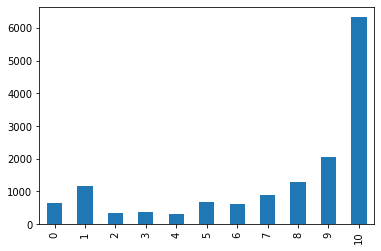

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

df.rating.value_counts().sort_index().plot(kind='bar')
#df.rating.plot.hist(bins=10) #히스토그램을 그릴 수도 있다.
plt.show()

1. 평점이 0부터 10으로 위치해 있어서 감성 분석과 같이 긍부정으로 결론을 내려면 평점으로부터 기준 값을 잡아 두 개의 클래스로 분류를 해야 한다.
2. 평점이 고르게 분포하지 않고, 불균형하게 분포되어 있다.
불균형 데이터에서 성능 측정을 위해 사용하는 지표는 정밀도와 재현율이 있다.


| | 긍정으로 예측한 리뷰(PP) | 부정으로 예측한 리뷰(PN) |
|---|---|---|
|실제 긍정인 리뷰(P) | True positive(TP) | False negative(FN) |
|실제 부정인 리뷰(N) | False positive(FP) | True negative(TN) |



In [22]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 453 kB 63.3 MB/s 


In [23]:
from sklearn.model_selection import train_test_split

# split data and labels into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(df.review, df.rating, random_state=7)
print('#Train set size:', len(X_train))
print('#Test set size:', len(X_test))

from konlpy.tag import Okt #konlpy에서 Twitter 형태소 분석기를 import
#from konlpy.tag import Twitter #konlpy에서 Twitter 형태소 분석기를 import
okt = Okt()

def twit_tokenizer(text): #전체를 다 사용하는 대신, 명사, 동사, 형용사를 사용
    target_tags = ['Noun', 'Verb', 'Adjective']
    result = []
    for word, tag in okt.pos(text, norm=True, stem=True):
        if tag in target_tags:
            result.append(word)
    return result

tfidf = TfidfVectorizer(tokenizer=twit_tokenizer, max_features=2000, min_df=5, max_df=0.5) #명사, 동사, 형용사를 이용하여 tfidf 생성
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

#Train set size: 11043
#Test set size: 3682


In [24]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()  #객체를 생성
lr.fit(X_train_tfidf, y_train)
print('#Regression Train set R2 score: {:.3f}'.format(lr.score(X_train_tfidf, y_train)))
print('#Regression Test set R2 score: {:.3f}'.format(lr.score(X_test_tfidf, y_test)))

#Regression Train set R2 score: 0.605
#Regression Test set R2 score: 0.395


In [28]:
y_train_senti = (y_train > 5)
y_test_senti = (y_test > 5)

y_train_predict = (lr.predict(X_train_tfidf) > 5)
y_test_predict = (lr.predict(X_test_tfidf) > 5)

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print('#Accuracy for train set: {:.3f}'.format(accuracy_score(y_train_senti, y_train_predict)))
print('#Precision for train set: {:.3f}'.format(precision_score(y_train_senti, y_train_predict)))
print('#Recall for train set: {:.3f}'.format(recall_score(y_train_senti, y_train_predict)))
print('#F1 for train set: {:.3f}'.format(f1_score(y_train_senti, y_train_predict)))

print('#Accuracy for test set: {:.3f}'.format(accuracy_score(y_test_senti, y_test_predict)))
print('#Precision for test set: {:.3f}'.format(precision_score(y_test_senti, y_test_predict)))
print('#Recall for test set: {:.3f}'.format(recall_score(y_test_senti, y_test_predict)))
print('#F1 for test set: {:.3f}'.format(f1_score(y_test_senti, y_test_predict)))

#Accuracy for train set: 0.888
#Precision for train set: 0.893
#Recall for train set: 0.969
#F1 for train set: 0.929
#Accuracy for test set: 0.848
#Precision for test set: 0.868
#Recall for test set: 0.946
#F1 for test set: 0.905


In [29]:
from sklearn.linear_model import LogisticRegression #sklearn이 제공하는 logistic regression을 사용

#count vector에 대해 regression을 해서 NB와 비교
LR_clf = LogisticRegression() #분류기 선언
LR_clf.fit(X_train_tfidf, y_train_senti) # train data를 이용하여 분류기를 학습

y_train_predict = LR_clf.predict(X_train_tfidf)
y_test_predict = LR_clf.predict(X_test_tfidf)

print('#Accuracy for train set: {:.3f}'.format(accuracy_score(y_train_senti, y_train_predict)))
print('#Precision for train set: {:.3f}'.format(precision_score(y_train_senti, y_train_predict)))
print('#Recall for train set: {:.3f}'.format(recall_score(y_train_senti, y_train_predict)))
print('#F1 for train set: {:.3f}'.format(f1_score(y_train_senti, y_train_predict)))

print('#Accuracy for test set: {:.3f}'.format(accuracy_score(y_test_senti, y_test_predict)))
print('#Precision for test set: {:.3f}'.format(precision_score(y_test_senti, y_test_predict)))
print('#Recall for test set: {:.3f}'.format(recall_score(y_test_senti, y_test_predict)))
print('#F1 for test set: {:.3f}'.format(f1_score(y_test_senti, y_test_predict)))

#Accuracy for train set: 0.878
#Precision for train set: 0.878
#Recall for train set: 0.973
#F1 for train set: 0.923
#Accuracy for test set: 0.855
#Precision for test set: 0.866
#Recall for test set: 0.958
#F1 for test set: 0.910


## 8.4 참고문헌

Finn Årup Nielsen A new ANEW: Evaluation of a word list for sentiment analysis in microblogs. Proceedings of the ESWC2011 Workshop on 'Making Sense of Microposts': Big things come in small packages 718 in CEUR Workshop Proceedings 93-98. 2011 May.

Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text. Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.